# Data Preprocessing
In this notebook we create a dataset from raw data. This dataset which contains data about valenbisi network, weather data and data about festivities will be then used for data clustering and data analysing. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load data
First of all we need to load raw data. Each data point in raw data is a snapshot of situation in a particular station, which is distinguished by gid identifier. Attributes date and time identify when the snapshot was created.

In [2]:
data = pd.read_csv('../data/merged_data/vwh.csv', sep=',')
print(len(data))
print(data.head())

/tmp/ipykernel_166706/1892794549.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/merged_data/vwh.csv', sep=',')


10891319
         date   time     gid  number  \
0  2022-12-01  02:00  901622      42   
1  2022-12-01  02:00  901641      61   
2  2022-12-01  02:00  901655      75   
3  2022-12-01  02:00  901626      46   
4  2022-12-01  02:00  901646      66   

                                       address open  available  free  total  \
0              Av. de la Plata (Museo Fallero)    T         18     2     20   
1                 Vicent Vidal - Pintor Maella    T          8    12     20   
2              República Argentina - Campoamor    T          4    21     25   
3  Pintor Luis Arcas - Inst. Obrero Valenciano    T         14     6     20   
4            Guillem de Anglesola - Av. Puerto    T          1    23     25   

  ticket  ...           w_sky  w_precip w_humid  w_wind_speed  w_wind_angle  \
0      T  ...  Cielo cubierto       0.0    66.0           6.8         349.0   
1      T  ...  Cielo cubierto       0.0    66.0           6.8         349.0   
2      T  ...  Cielo cubierto       0.

## Latitude and Longitude of the stations
Next we need to extract information about station's location. We will use latitude and longitude of each station. They are stored in the column named **geo_point_2d**, first is latitude and second is longitude.

In [3]:
data[["lat", "long"]] = data['geo_point_2d'].str.split(',', expand=True)
data.head()

,date,time,gid,number,address,open,available,free,total,ticket,...,w_humid,w_wind_speed,w_wind_angle,w_clouds,w_visib,dayofweek,day_category,day_motive,lat,long
0,2022-12-01,02:00,901622,42,Av. de la Plata (Museo Fallero),T,18,2,20,T,...,66.0,6.8,349.0,88.0,10.0,Thursday,Working day,NaN,39.45878127329601,-0.3586583378805894
1,2022-12-01,02:00,901641,61,Vicent Vidal - Pintor Maella,T,8,12,20,T,...,66.0,6.8,349.0,88.0,10.0,Thursday,Working day,NaN,39.46129327599964,-0.34783029886743094
2,2022-12-01,02:00,901655,75,República Argentina - Campoamor,T,4,21,25,T,...,66.0,6.8,349.0,88.0,10.0,Thursday,Working day,NaN,39.472113313853896,-0.35170130420295115
3,2022-12-01,02:00,901626,46,Pintor Luis Arcas - Inst. Obrero Valenciano,T,14,6,20,F,...,66.0,6.8,349.0,88.0,10.0,Thursday,Working day,NaN,39.455509261762266,-0.35878734087160885
4,2022-12-01,02:00,901646,66,Guillem de Anglesola - Av. Puerto,T,1,23,25,F,...,66.0,6.8,349.0,88.0,10.0,Thursday,Working day,NaN,39.46427128532339,-0.3462612916525901


## Retype features
Let's check the type of the attributes and convert them if necessary.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10891319 entries, 0 to 10891318
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   time          object 
 2   gid           int64  
 3   number        int64  
 4   address       object 
 5   open          object 
 6   available     int64  
 7   free          int64  
 8   total         int64  
 9   ticket        object 
 10  geo_point_2d  object 
 11  w_temp        float64
 12  w_sky         object 
 13  w_precip      float64
 14  w_humid       float64
 15  w_wind_speed  float64
 16  w_wind_angle  float64
 17  w_clouds      float64
 18  w_visib       float64
 19  dayofweek     object 
 20  day_category  object 
 21  day_motive    object 
 22  lat           object 
 23  long          object 
dtypes: float64(7), int64(5), object(12)
memory usage: 1.9+ GB


In [5]:
data["lat"] = data["lat"].astype(float)
data["long"] = data["long"].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10891319 entries, 0 to 10891318
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   time          object 
 2   gid           int64  
 3   number        int64  
 4   address       object 
 5   open          object 
 6   available     int64  
 7   free          int64  
 8   total         int64  
 9   ticket        object 
 10  geo_point_2d  object 
 11  w_temp        float64
 12  w_sky         object 
 13  w_precip      float64
 14  w_humid       float64
 15  w_wind_speed  float64
 16  w_wind_angle  float64
 17  w_clouds      float64
 18  w_visib       float64
 19  dayofweek     object 
 20  day_category  object 
 21  day_motive    object 
 22  lat           float64
 23  long          float64
dtypes: float64(9), int64(5), object(10)
memory usage: 1.9+ GB


In [6]:
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
print(data["datetime"].min())
print(data["datetime"].max())
print(data.head())

2022-12-01 02:00:00
2024-02-29 23:45:00
         date   time     gid  number  \
0  2022-12-01  02:00  901622      42   
1  2022-12-01  02:00  901641      61   
2  2022-12-01  02:00  901655      75   
3  2022-12-01  02:00  901626      46   
4  2022-12-01  02:00  901646      66   

                                       address open  available  free  total  \
0              Av. de la Plata (Museo Fallero)    T         18     2     20   
1                 Vicent Vidal - Pintor Maella    T          8    12     20   
2              República Argentina - Campoamor    T          4    21     25   
3  Pintor Luis Arcas - Inst. Obrero Valenciano    T         14     6     20   
4            Guillem de Anglesola - Av. Puerto    T          1    23     25   

  ticket  ... w_wind_speed  w_wind_angle w_clouds  w_visib  dayofweek  \
0      T  ...          6.8         349.0     88.0     10.0   Thursday   
1      T  ...          6.8         349.0     88.0     10.0   Thursday   
2      T  ...          6.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10891319 entries, 0 to 10891318
Data columns (total 25 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          object        
 1   time          object        
 2   gid           int64         
 3   number        int64         
 4   address       object        
 5   open          object        
 6   available     int64         
 7   free          int64         
 8   total         int64         
 9   ticket        object        
 10  geo_point_2d  object        
 11  w_temp        float64       
 12  w_sky         object        
 13  w_precip      float64       
 14  w_humid       float64       
 15  w_wind_speed  float64       
 16  w_wind_angle  float64       
 17  w_clouds      float64       
 18  w_visib       float64       
 19  dayofweek     object        
 20  day_category  object        
 21  day_motive    object        
 22  lat           float64       
 23  long          float64       
 

## Info about stations' occupancy and total number of spaces
We need to have information about each stations' size and about how each station is used. For that we need to obtain stations' occupancy (percentage of used racks in a station) and vacancy (percentage of free racks in a station) for each time snapshot.

In [8]:
# array of all the stations in the network
stations = data.gid.unique()
stations

array([901622, 901641, 901655, 901626, 901646, 901658, 901660, 901664,
       901668, 901680, 901644, 901665, 901583, 901587, 901589, 901590,
       901592, 901604, 901606, 901608, 901612, 901599, 901601, 901611,
       901629, 901631, 901633, 901635, 901638, 901691, 901693, 901695,
       901711, 901712, 901714, 901728, 901744, 901724, 901729, 901731,
       901770, 901778, 901769, 901771, 901773, 901775, 901777, 901723,
       901727, 901726, 901754, 901681, 901688, 901698, 901767, 901742,
       901762, 901766, 901768, 901803, 901805, 901807, 901817, 901819,
       901822, 901826, 901787, 901833, 901789, 901793, 901809, 901813,
       901800, 901814, 901841, 901845, 901851, 901853, 901855, 901852,
       901854, 901624, 901625, 901643, 901623, 901642, 901652, 901654,
       901657, 901647, 901649, 901651, 901674, 901663, 901667, 901669,
       901581, 901595, 901582, 901584, 901586, 901602, 901610, 901616,
       901618, 901597, 901607, 901615, 901621, 901637, 901639, 901628,
      

In [9]:
len(stations)

276

### Station's size

In [10]:
# extracting information about each station's total number of available racks
stations_size = data.groupby(["gid"])["total"].mean()
stations_size

gid
901581    25.0
901582    15.0
901583    20.0
901584    25.0
901585    15.0
          ... 
901852    15.0
901853    15.0
901854    15.0
901855    20.0
901856    20.0
Name: total, Length: 276, dtype: float64

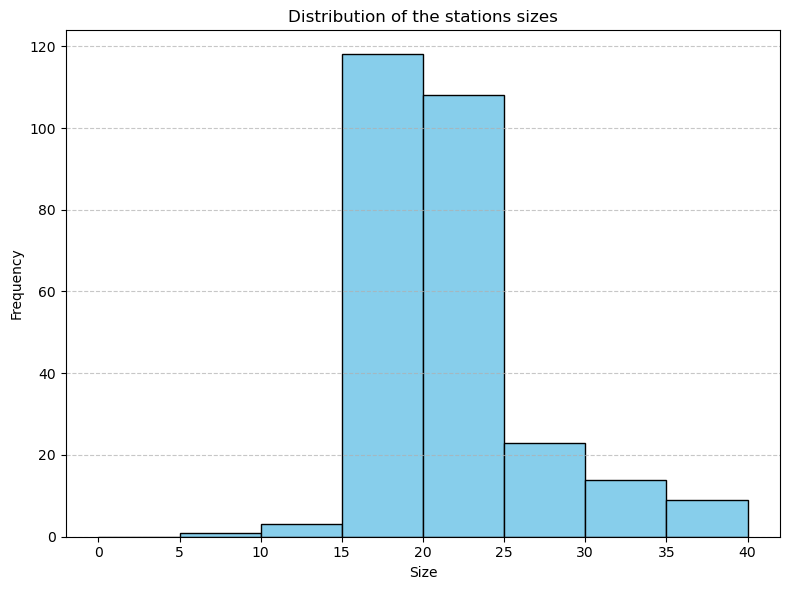

In [11]:
bin_width = 5
plt.figure(figsize=(8, 6))
plt.hist(stations_size, bins=range(0, math.ceil(stations_size.max()) + bin_width, bin_width), color='skyblue', edgecolor='black')
plt.title('Distribution of the stations sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Occupancy

In [12]:
stations_available = data.groupby(["gid"])["available"].mean()
stations_available

gid
901581     5.268816
901582     4.782742
901583     3.793624
901584     4.293345
901585     4.055702
            ...    
901852    10.698563
901853    10.809128
901854     8.808829
901855    12.218449
901856    10.206122
Name: available, Length: 276, dtype: float64

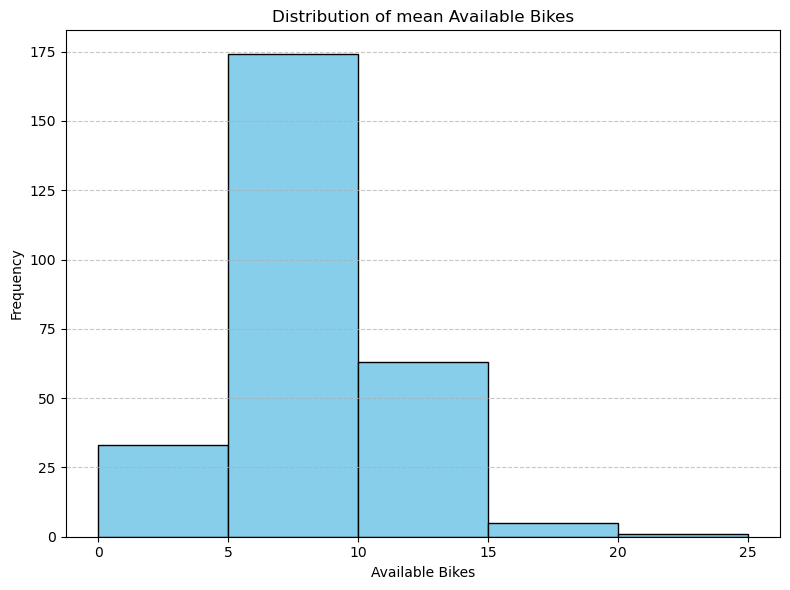

In [13]:
bin_width = 5
plt.figure(figsize=(8, 6))
plt.hist(stations_available, bins=range(0, math.ceil(stations_available.max()) + bin_width, bin_width), color='skyblue', edgecolor='black')
plt.title('Distribution of mean Available Bikes')
plt.xlabel('Available Bikes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# percentage of occupied spaces
data["occupancy"] = data["available"] / data["total"]
data.head()

,date,time,gid,number,address,open,available,free,total,ticket,...,w_wind_angle,w_clouds,w_visib,dayofweek,day_category,day_motive,lat,long,datetime,occupancy
0,2022-12-01,02:00,901622,42,Av. de la Plata (Museo Fallero),T,18,2,20,T,...,349.0,88.0,10.0,Thursday,Working day,NaN,39.458781,-0.358658,2022-12-01 02:00:00,0.90
1,2022-12-01,02:00,901641,61,Vicent Vidal - Pintor Maella,T,8,12,20,T,...,349.0,88.0,10.0,Thursday,Working day,NaN,39.461293,-0.347830,2022-12-01 02:00:00,0.40
2,2022-12-01,02:00,901655,75,República Argentina - Campoamor,T,4,21,25,T,...,349.0,88.0,10.0,Thursday,Working day,NaN,39.472113,-0.351701,2022-12-01 02:00:00,0.16
3,2022-12-01,02:00,901626,46,Pintor Luis Arcas - Inst. Obrero Valenciano,T,14,6,20,F,...,349.0,88.0,10.0,Thursday,Working day,NaN,39.455509,-0.358787,2022-12-01 02:00:00,0.70
4,2022-12-01,02:00,901646,66,Guillem de Anglesola - Av. Puerto,T,1,23,25,F,...,349.0,88.0,10.0,Thursday,Working day,NaN,39.464271,-0.346261,2022-12-01 02:00:00,0.04


### Vacancy

In [15]:
stations_free = data.groupby(["gid"])["free"].mean()
stations_free

gid
901581    19.606786
901582    10.058414
901583    16.002686
901584    20.054407
901585    10.854207
            ...    
901852     4.080611
901853     4.055726
901854     5.770209
901855     7.615053
901856     9.479651
Name: free, Length: 276, dtype: float64

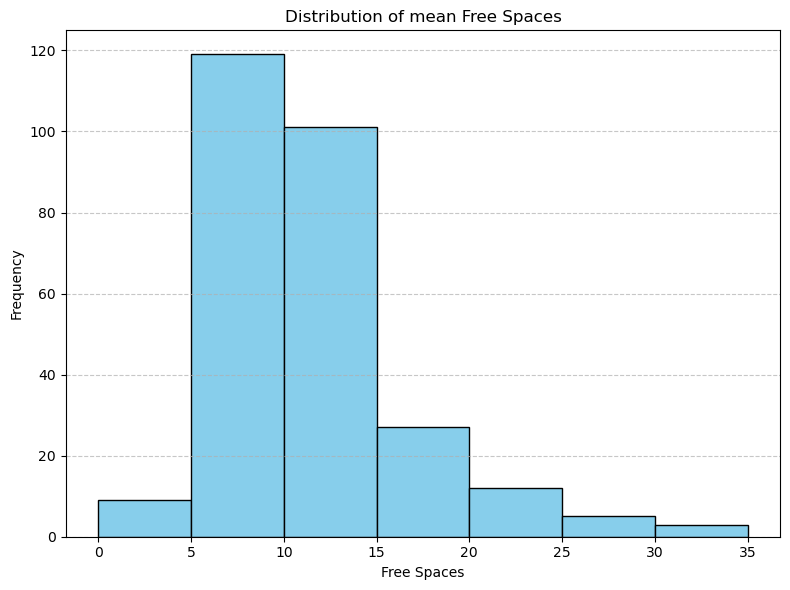

In [16]:
bin_width = 5
plt.figure(figsize=(8, 6))
plt.hist(stations_free, bins=range(0, math.ceil(stations_free.max()) + bin_width, bin_width), color='skyblue', edgecolor='black')
plt.title('Distribution of mean Free Spaces')
plt.xlabel('Free Spaces')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# percentage of free spaces
data["vacancy"] = data["free"] / data["total"]
data.head()

,date,time,gid,number,address,open,available,free,total,ticket,...,w_clouds,w_visib,dayofweek,day_category,day_motive,lat,long,datetime,occupancy,vacancy
0,2022-12-01,02:00,901622,42,Av. de la Plata (Museo Fallero),T,18,2,20,T,...,88.0,10.0,Thursday,Working day,NaN,39.458781,-0.358658,2022-12-01 02:00:00,0.90,0.10
1,2022-12-01,02:00,901641,61,Vicent Vidal - Pintor Maella,T,8,12,20,T,...,88.0,10.0,Thursday,Working day,NaN,39.461293,-0.347830,2022-12-01 02:00:00,0.40,0.60
2,2022-12-01,02:00,901655,75,República Argentina - Campoamor,T,4,21,25,T,...,88.0,10.0,Thursday,Working day,NaN,39.472113,-0.351701,2022-12-01 02:00:00,0.16,0.84
3,2022-12-01,02:00,901626,46,Pintor Luis Arcas - Inst. Obrero Valenciano,T,14,6,20,F,...,88.0,10.0,Thursday,Working day,NaN,39.455509,-0.358787,2022-12-01 02:00:00,0.70,0.30
4,2022-12-01,02:00,901646,66,Guillem de Anglesola - Av. Puerto,T,1,23,25,F,...,88.0,10.0,Thursday,Working day,NaN,39.464271,-0.346261,2022-12-01 02:00:00,0.04,0.92


## Add increase or decrease of previous state
We need to create some metrics how to see how each station is used in time. For this we will create these features:
* **bikes_diff** = how differs number of bikes from previous measurement
* **free_diff** = how differs number of free spaces from previous measurement

These new features will help us to see how many rents were made in time.

In [18]:
# Sort the dataframe by datetime
data = data.sort_values(by='datetime')

data['bikes_diff'] = data.groupby('gid')['available'].diff()
data['free_diff'] = data.groupby('gid')['free'].diff()

# Fill NaN values with 0 (for the first measurement of each station)
data['bikes_diff'].fillna(0, inplace=True)
data['free_diff'].fillna(0, inplace=True)

/tmp/ipykernel_166706/52843047.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bikes_diff'].fillna(0, inplace=True)
/tmp/ipykernel_166706/52843047.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [19]:
# example of how the station's usage changes over time for a random selected station
data.loc[data.gid == 901644].head(100)

,date,time,gid,number,address,open,available,free,total,ticket,...,dayofweek,day_category,day_motive,lat,long,datetime,occupancy,vacancy,bikes_diff,free_diff
10,2022-12-01,02:00,901644,64,Av. Puerto 61-63,T,2,18,20,F,...,Thursday,Working day,NaN,39.466518,-0.354195,2022-12-01 02:00:00,0.10,0.90,0.0,0.0
286,2022-12-01,02:15,901644,64,Av. Puerto 61-63,T,2,18,20,F,...,Thursday,Working day,NaN,39.466518,-0.354195,2022-12-01 02:15:00,0.10,0.90,0.0,0.0
562,2022-12-01,02:30,901644,64,Av. Puerto 61-63,T,2,18,20,F,...,Thursday,Working day,NaN,39.466518,-0.354195,2022-12-01 02:30:00,0.10,0.90,0.0,0.0
838,2022-12-01,02:45,901644,64,Av. Puerto 61-63,T,2,18,20,F,...,Thursday,Working day,NaN,39.466518,-0.354195,2022-12-01 02:45:00,0.10,0.90,0.0,0.0
1114,2022-12-01,03:00,901644,64,Av. Puerto 61-63,T,2,18,20,F,...,Thursday,Working day,NaN,39.466518,-0.354195,2022-12-01 03:00:00,0.10,0.90,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,2022-12-02,02:00,901644,64,Av. Puerto 61-63,T,12,7,20,F,...,Friday,Working day,NaN,39.466518,-0.354195,2022-12-02 02:00:00,0.60,0.35,1.0,-1.0
26707,2022-12-02,02:15,901644,64,Av. Puerto 61-63,T,12,7,20,F,...,Friday,Working day,NaN,39.466518,-0.354195,2022-12-02 02:15:00,0.60,0.35,0.0,0.0
26862,2022-12-02,02:30,901644,64,Av. Puerto 61-63,T,12,7,20,F,...,Friday,Working day,NaN,39.466518,-0.354195,2022-12-02 02:30:00,0.60,0.35,0.0,0.0
27141,2022-12-02,02:45,901644,64,Av. Puerto 61-63,T,12,7,20,F,...,Friday,Working day,NaN,39.466518,-0.354195,2022-12-02 02:45:00,0.60,0.35,0.0,0.0


## Plot stations on map

In [20]:
# location of each stations
locations = data[["gid", "lat", "long"]].drop_duplicates()
print(locations.head())

# check if there are some errors in data
if len(locations) != locations.gid.unique().shape[0]:
    print("some stations has multiple locations")

        gid        lat      long
0    901622  39.458781 -0.358658
175  901673  39.472282 -0.343809
176  901677  39.473068 -0.343132
177  901679  39.471344 -0.340484
178  901627  39.456512 -0.355418


In [22]:
import folium 

f = folium.Figure(width=700, height=700)
map = folium.Map(location=[39.4502730411, -0.333362], tiles='OpenStreetMap', zoom_start=12)

for station in stations:
    folium.Circle(
        location=[locations[locations.gid == station]['lat'].iloc[0], locations[locations.gid == station]['long'].iloc[0]],
        color='black',
        radius=5 * stations_size.loc[station],
        fill=True,
        opacity=0.8,
        fill_opacity=0.2
    ).add_to(map)

f.add_child(map)

### Visualisation of stations' size compared to what is the average number of available bikes

- Each black circle on the map is a station, size of the circle differs according to station's size. Stations with bigger total number of racks are bigger and vice versa.
- Red ring in black circle correspond to average number of available bikes in the station. Stations where the red ring is nearly the same size as the black circle are usually very full and it would be good to larger them or add another station near them.

In [21]:
import folium 

f = folium.Figure(width=700, height=700)
map = folium.Map(location=[39.4502730411, -0.333362], tiles='OpenStreetMap', zoom_start=12)

for station in stations:
    folium.Circle(
        location=[locations[locations.gid == station]['lat'].iloc[0], locations[locations.gid == station]['long'].iloc[0]],
        color='black',
        radius=5 * stations_size.loc[station],
        fill=True,
        opacity=0.8,
        fill_opacity=0.2
    ).add_to(map)
    
    folium.Circle(
        location=[locations[locations.gid == station]['lat'].iloc[0], locations[locations.gid == station]['long'].iloc[0]],
        color='red',
        radius=5 * stations_available.loc[station],
        fill=True,
        opacity=0.1,
        fill_opacity=0.3,
        tooltip='Station {} | Docks: {} | Average Bikes: {}'.format(
            station, stations_size.loc[station], round(stations_available.loc[station], 2))
    ).add_to(map)

f.add_child(map)

### Visualisation of stations' size compared to what is the average number of free racks

- Each black circle on a map is a station, size of circle differs according to station's size. Stations with bigger total number of rack are bigger and vice versa.
- Blue ring in black circle correspond to average number of free racks in the station. Stations where the blue ring is nearly the same size as the black circle are usually very empty.

In [22]:
f = folium.Figure(width=700, height=700)
map = folium.Map(location=[39.4502730411, -0.333362], tiles='OpenStreetMap', zoom_start=12)

for station in stations:
    folium.Circle(
        location=[locations[locations.gid == station]['lat'].iloc[0], locations[locations.gid == station]['long'].iloc[0]],
        color='black',
        radius=5 * stations_size.loc[station],
        fill=True,
        opacity=0.8,
        fill_opacity=0.2
    ).add_to(map)
    
    folium.Circle(
        location=[locations[locations.gid == station]['lat'].iloc[0], locations[locations.gid == station]['long'].iloc[0]],
        color='blue',
        radius=5 * stations_free.loc[station],
        fill=True,
        opacity=0.1,
        fill_opacity=0.3,
        tooltip='Station {} | Docks: {} | Average Free Docks: {}'.format(
            station, stations_size.loc[station], round(stations_free.loc[station], 2))
    ).add_to(map)

f.add_child(map)


## Delete non-necessary features
Some of the features are redundant or not necessary for future work we will delete them to make the dataset smaller and better organised.

In [23]:
data = data.drop(columns=["date", "time", "open", "ticket", "number", "address", "geo_point_2d", "w_wind_angle"])
data.head()

,gid,available,free,total,w_temp,w_sky,w_precip,w_humid,w_wind_speed,w_clouds,...,dayofweek,day_category,day_motive,lat,long,datetime,occupancy,vacancy,bikes_diff,free_diff
0,901622,18,2,20,12.0,Cielo cubierto,0.0,66.0,6.8,88.0,...,Thursday,Working day,NaN,39.458781,-0.358658,2022-12-01 02:00:00,0.900000,0.100000,0.0,0.0
175,901673,9,29,38,12.0,Cielo cubierto,0.0,66.0,6.8,88.0,...,Thursday,Working day,NaN,39.472282,-0.343809,2022-12-01 02:00:00,0.236842,0.763158,0.0,0.0
176,901677,15,8,23,12.0,Cielo cubierto,0.0,66.0,6.8,88.0,...,Thursday,Working day,NaN,39.473068,-0.343132,2022-12-01 02:00:00,0.652174,0.347826,0.0,0.0
177,901679,3,18,21,12.0,Cielo cubierto,0.0,66.0,6.8,88.0,...,Thursday,Working day,NaN,39.471344,-0.340484,2022-12-01 02:00:00,0.142857,0.857143,0.0,0.0
178,901627,15,4,20,12.0,Cielo cubierto,0.0,66.0,6.8,88.0,...,Thursday,Working day,NaN,39.456512,-0.355418,2022-12-01 02:00:00,0.750000,0.200000,0.0,0.0


## Save the dataset

In [24]:
data.to_csv('./datasets/dataset.csv', index=False)